In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu
from tensorflow.keras.regularizers import L2
from tensorflow.keras import regularizers

from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

import os
import gc
import numpy as np
import pickle

from sklearn.preprocessing import StandardScaler

from src import modules
from src.model import NAM

device = tf.config.list_physical_devices('GPU')[0]
tf.config.experimental.set_memory_growth(device,True)

from matplotlib import pyplot as plt
import seaborn as sbn
import matplotlib.patches as patches

from sklearn.metrics import confusion_matrix
import pandas as pds
import matplotlib as MP

In [2]:
n_fig_cols = 4
x_n_blocks = 30
color: list = [0.9, 0.4, 0.4]
batch_size = 128

ss = StandardScaler()
with open(os.path.join('data','house-prices.pkl'),'rb') as f:
    dataset = pickle.load(f)

train_x,train_y,valid_x,valid_y,test_x,test_y,column_x = dataset.values()

unique_dict = dict(
    train = {n: np.unique(x) for n, x in enumerate(train_x.transpose())},
    valid = {n: np.unique(x) for n, x in enumerate(valid_x.transpose())},
    test  = {n: np.unique(x) for n, x in enumerate(test_x.transpose())}
)

train_x = ss.fit_transform(train_x)
valid_x = ss.transform(valid_x)
test_x = ss.transform(test_x)
    
n_feature = train_x.shape[-1]


In [3]:
y_ss = StandardScaler()
scaled_train_y = y_ss.fit_transform(train_y.reshape(-1,1))
scaled_valid_y = y_ss.transform(valid_y.reshape(-1,1))
scaled_test_y = y_ss.transform(test_y.reshape(-1,1))

In [4]:
metric = tf.keras.metrics.MeanAbsoluteError()

nam = NAM(

    n_feature = n_feature,
    exu_unit = 1000,
    linear_unit = [64,32],
    mode = 'reg', # choose one of 'reg' or 'cls'
    n_class = 1,  # For regression, NAM should has only one output, but also using multi-output regression
    dropout_ratio = .1, # The one of options for regularization
    layer_regularization = 1e-1, # The another of options for regularization
    feature_regularization = 1e-1,
    first_layer_type = 'ExU',
    
)

nam.compile(
    optimizer = tf.optimizers.Adam(),
    loss = nam.loss_fn, 
    metrics = metric
)

nam.fit(
    train_x.astype(np.float32),scaled_train_y.astype(np.float32),
    batch_size = batch_size,
    epochs = 1000,
    validation_data = (valid_x.astype(np.float32),scaled_valid_y.astype(np.float32)),
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            patience = 5, restore_best_weights=True,
        )
    ]
)

Epoch 1/1000
8/8 [==============================] - 17s 387ms/step - loss: 2173.1155 - mean_absolute_error: 10.8636 - val_loss: 2009.2190 - val_mean_absolute_error: 9.7495
Epoch 2/1000
8/8 [==============================] - 0s 53ms/step - loss: 1878.2546 - mean_absolute_error: 7.1602 - val_loss: 1699.4767 - val_mean_absolute_error: 3.2429
Epoch 3/1000
8/8 [==============================] - 0s 51ms/step - loss: 1676.6946 - mean_absolute_error: 4.9518 - val_loss: 1587.3182 - val_mean_absolute_error: 3.1660
Epoch 4/1000
8/8 [==============================] - 0s 53ms/step - loss: 1582.8331 - mean_absolute_error: 4.6802 - val_loss: 1436.9785 - val_mean_absolute_error: 2.0110
Epoch 5/1000
8/8 [==============================] - 0s 50ms/step - loss: 1420.6093 - mean_absolute_error: 3.7222 - val_loss: 1335.5453 - val_mean_absolute_error: 2.1082
Epoch 6/1000
8/8 [==============================] - 0s 53ms/step - loss: 1323.9478 - mean_absolute_error: 3.4464 - val_loss: 1244.5970 - val_mean_absolu

Epoch 50/1000
8/8 [==============================] - 0s 50ms/step - loss: 202.1858 - mean_absolute_error: 0.3775 - val_loss: 198.2578 - val_mean_absolute_error: 0.3580
Epoch 51/1000
8/8 [==============================] - 0s 50ms/step - loss: 195.7337 - mean_absolute_error: 0.4108 - val_loss: 191.9541 - val_mean_absolute_error: 0.3259
Epoch 52/1000
8/8 [==============================] - 0s 48ms/step - loss: 189.4734 - mean_absolute_error: 0.3697 - val_loss: 185.8415 - val_mean_absolute_error: 0.3026
Epoch 53/1000
8/8 [==============================] - 0s 51ms/step - loss: 183.5799 - mean_absolute_error: 0.3959 - val_loss: 180.0247 - val_mean_absolute_error: 0.3096
Epoch 54/1000
8/8 [==============================] - 0s 50ms/step - loss: 177.8051 - mean_absolute_error: 0.3810 - val_loss: 174.4417 - val_mean_absolute_error: 0.3115
Epoch 55/1000
8/8 [==============================] - 0s 52ms/step - loss: 172.6864 - mean_absolute_error: 0.3894 - val_loss: 169.1009 - val_mean_absolute_error:

8/8 [==============================] - 0s 51ms/step - loss: 52.5575 - mean_absolute_error: 0.2936 - val_loss: 51.8627 - val_mean_absolute_error: 0.2817
Epoch 100/1000
8/8 [==============================] - 0s 49ms/step - loss: 51.3308 - mean_absolute_error: 0.2995 - val_loss: 50.6997 - val_mean_absolute_error: 0.2881
Epoch 101/1000
8/8 [==============================] - 0s 50ms/step - loss: 50.2007 - mean_absolute_error: 0.2974 - val_loss: 49.5490 - val_mean_absolute_error: 0.2830
Epoch 102/1000
8/8 [==============================] - 0s 49ms/step - loss: 49.0439 - mean_absolute_error: 0.2899 - val_loss: 48.4770 - val_mean_absolute_error: 0.2923
Epoch 103/1000
8/8 [==============================] - 0s 50ms/step - loss: 47.9630 - mean_absolute_error: 0.2941 - val_loss: 47.3819 - val_mean_absolute_error: 0.2917
Epoch 104/1000
8/8 [==============================] - 0s 51ms/step - loss: 46.9148 - mean_absolute_error: 0.3065 - val_loss: 46.3205 - val_mean_absolute_error: 0.2911
Epoch 105/100

8/8 [==============================] - 0s 50ms/step - loss: 19.5792 - mean_absolute_error: 0.2886 - val_loss: 19.4259 - val_mean_absolute_error: 0.2935
Epoch 149/1000
8/8 [==============================] - 0s 49ms/step - loss: 19.2092 - mean_absolute_error: 0.2786 - val_loss: 19.0823 - val_mean_absolute_error: 0.2879
Epoch 150/1000
8/8 [==============================] - 0s 51ms/step - loss: 18.9059 - mean_absolute_error: 0.2909 - val_loss: 18.7575 - val_mean_absolute_error: 0.2890
Epoch 151/1000
8/8 [==============================] - 0s 51ms/step - loss: 18.5375 - mean_absolute_error: 0.2823 - val_loss: 18.4100 - val_mean_absolute_error: 0.2803
Epoch 152/1000
8/8 [==============================] - 0s 51ms/step - loss: 18.2274 - mean_absolute_error: 0.2829 - val_loss: 18.0992 - val_mean_absolute_error: 0.2835
Epoch 153/1000
8/8 [==============================] - 0s 53ms/step - loss: 17.8951 - mean_absolute_error: 0.2752 - val_loss: 17.7746 - val_mean_absolute_error: 0.2821
Epoch 154/100

8/8 [==============================] - 0s 51ms/step - loss: 8.8241 - mean_absolute_error: 0.2718 - val_loss: 8.8258 - val_mean_absolute_error: 0.2861
Epoch 198/1000
8/8 [==============================] - 0s 51ms/step - loss: 8.7250 - mean_absolute_error: 0.2802 - val_loss: 8.7109 - val_mean_absolute_error: 0.2900
Epoch 199/1000
8/8 [==============================] - 0s 54ms/step - loss: 8.5911 - mean_absolute_error: 0.2785 - val_loss: 8.6108 - val_mean_absolute_error: 0.2958
Epoch 200/1000
8/8 [==============================] - 0s 51ms/step - loss: 8.4588 - mean_absolute_error: 0.2837 - val_loss: 8.4712 - val_mean_absolute_error: 0.2995
Epoch 201/1000
8/8 [==============================] - 0s 51ms/step - loss: 8.3208 - mean_absolute_error: 0.2745 - val_loss: 8.3203 - val_mean_absolute_error: 0.2853
Epoch 202/1000
8/8 [==============================] - 0s 53ms/step - loss: 8.2060 - mean_absolute_error: 0.2721 - val_loss: 8.2139 - val_mean_absolute_error: 0.2839
Epoch 203/1000
8/8 [=====

Epoch 247/1000
8/8 [==============================] - 0s 48ms/step - loss: 4.4050 - mean_absolute_error: 0.2793 - val_loss: 4.4370 - val_mean_absolute_error: 0.2828
Epoch 248/1000
8/8 [==============================] - 0s 50ms/step - loss: 4.3357 - mean_absolute_error: 0.2730 - val_loss: 4.3680 - val_mean_absolute_error: 0.2819
Epoch 249/1000
8/8 [==============================] - 0s 49ms/step - loss: 4.2840 - mean_absolute_error: 0.2824 - val_loss: 4.3147 - val_mean_absolute_error: 0.2847
Epoch 250/1000
8/8 [==============================] - 0s 52ms/step - loss: 4.2113 - mean_absolute_error: 0.2724 - val_loss: 4.2508 - val_mean_absolute_error: 0.2858
Epoch 251/1000
8/8 [==============================] - 0s 50ms/step - loss: 4.1778 - mean_absolute_error: 0.2846 - val_loss: 4.2084 - val_mean_absolute_error: 0.2816
Epoch 252/1000
8/8 [==============================] - 0s 50ms/step - loss: 4.0965 - mean_absolute_error: 0.2691 - val_loss: 4.1513 - val_mean_absolute_error: 0.2814
Epoch 253/

Epoch 297/1000
8/8 [==============================] - 0s 49ms/step - loss: 2.3724 - mean_absolute_error: 0.2723 - val_loss: 2.4317 - val_mean_absolute_error: 0.2836
Epoch 298/1000
8/8 [==============================] - 0s 51ms/step - loss: 2.3278 - mean_absolute_error: 0.2708 - val_loss: 2.3924 - val_mean_absolute_error: 0.2847
Epoch 299/1000
8/8 [==============================] - 0s 49ms/step - loss: 2.3196 - mean_absolute_error: 0.2793 - val_loss: 2.3847 - val_mean_absolute_error: 0.3025
Epoch 300/1000
8/8 [==============================] - 0s 50ms/step - loss: 2.3194 - mean_absolute_error: 0.2858 - val_loss: 2.3592 - val_mean_absolute_error: 0.2907
Epoch 301/1000
8/8 [==============================] - 0s 50ms/step - loss: 2.2410 - mean_absolute_error: 0.2697 - val_loss: 2.3177 - val_mean_absolute_error: 0.2980
Epoch 302/1000
8/8 [==============================] - 0s 52ms/step - loss: 2.2418 - mean_absolute_error: 0.2847 - val_loss: 2.3093 - val_mean_absolute_error: 0.2948
Epoch 303/

Epoch 347/1000
8/8 [==============================] - 0s 50ms/step - loss: 1.3652 - mean_absolute_error: 0.2812 - val_loss: 1.4554 - val_mean_absolute_error: 0.2918
Epoch 348/1000
8/8 [==============================] - 0s 53ms/step - loss: 1.3509 - mean_absolute_error: 0.2734 - val_loss: 1.4309 - val_mean_absolute_error: 0.2858
Epoch 349/1000
8/8 [==============================] - 0s 51ms/step - loss: 1.3417 - mean_absolute_error: 0.2725 - val_loss: 1.4165 - val_mean_absolute_error: 0.2894
Epoch 350/1000
8/8 [==============================] - 0s 50ms/step - loss: 1.3267 - mean_absolute_error: 0.2783 - val_loss: 1.4161 - val_mean_absolute_error: 0.2917
Epoch 351/1000
8/8 [==============================] - 0s 54ms/step - loss: 1.3177 - mean_absolute_error: 0.2637 - val_loss: 1.4020 - val_mean_absolute_error: 0.2880
Epoch 352/1000
8/8 [==============================] - 0s 51ms/step - loss: 1.3079 - mean_absolute_error: 0.2716 - val_loss: 1.3758 - val_mean_absolute_error: 0.2862
Epoch 353/

Epoch 397/1000
8/8 [==============================] - 0s 46ms/step - loss: 0.8674 - mean_absolute_error: 0.2801 - val_loss: 0.9168 - val_mean_absolute_error: 0.2836
Epoch 398/1000
8/8 [==============================] - 0s 53ms/step - loss: 0.8512 - mean_absolute_error: 0.2841 - val_loss: 0.9616 - val_mean_absolute_error: 0.3078
Epoch 399/1000
8/8 [==============================] - 0s 49ms/step - loss: 0.8436 - mean_absolute_error: 0.2762 - val_loss: 0.9454 - val_mean_absolute_error: 0.2981
Epoch 400/1000
8/8 [==============================] - 0s 52ms/step - loss: 0.8355 - mean_absolute_error: 0.2708 - val_loss: 0.9033 - val_mean_absolute_error: 0.2846
Epoch 401/1000
8/8 [==============================] - 0s 52ms/step - loss: 0.8328 - mean_absolute_error: 0.2677 - val_loss: 0.8935 - val_mean_absolute_error: 0.2836
Epoch 402/1000
8/8 [==============================] - 0s 54ms/step - loss: 0.8151 - mean_absolute_error: 0.2674 - val_loss: 0.8850 - val_mean_absolute_error: 0.2812
Epoch 403/

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


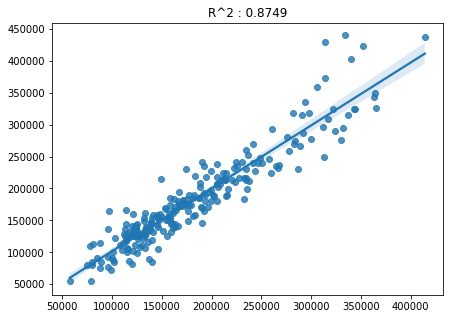

In [74]:
preds = nam.predict(test_x)
plt.rcParams['font.size'] = 10

# confusion_matrix(test_y,preds.argmax(1))

from sklearn.metrics import r2_score

fig,ax = plt.subplots(1,1,figsize = (7,5))
sbn.regplot(y_ss.inverse_transform(preds),test_y,ax = ax)
ax.set_title(r'R^2 : {:.4f}'.format(r2_score(y_ss.inverse_transform(preds),test_y)))
fig.savefig('reg_result.png')

In [16]:
n_class = 1

In [17]:
def list_chunk(lst, n):
    return [lst[i:i+n] for i in range(0, len(lst), n)]

data = list_chunk(train_x ,batch_size)
total_contribution = tf.concat([nam.extract(x,False) for x in data],0)[:,:,0]

scaler09 = lambda x: x  / x.sum() * .9

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


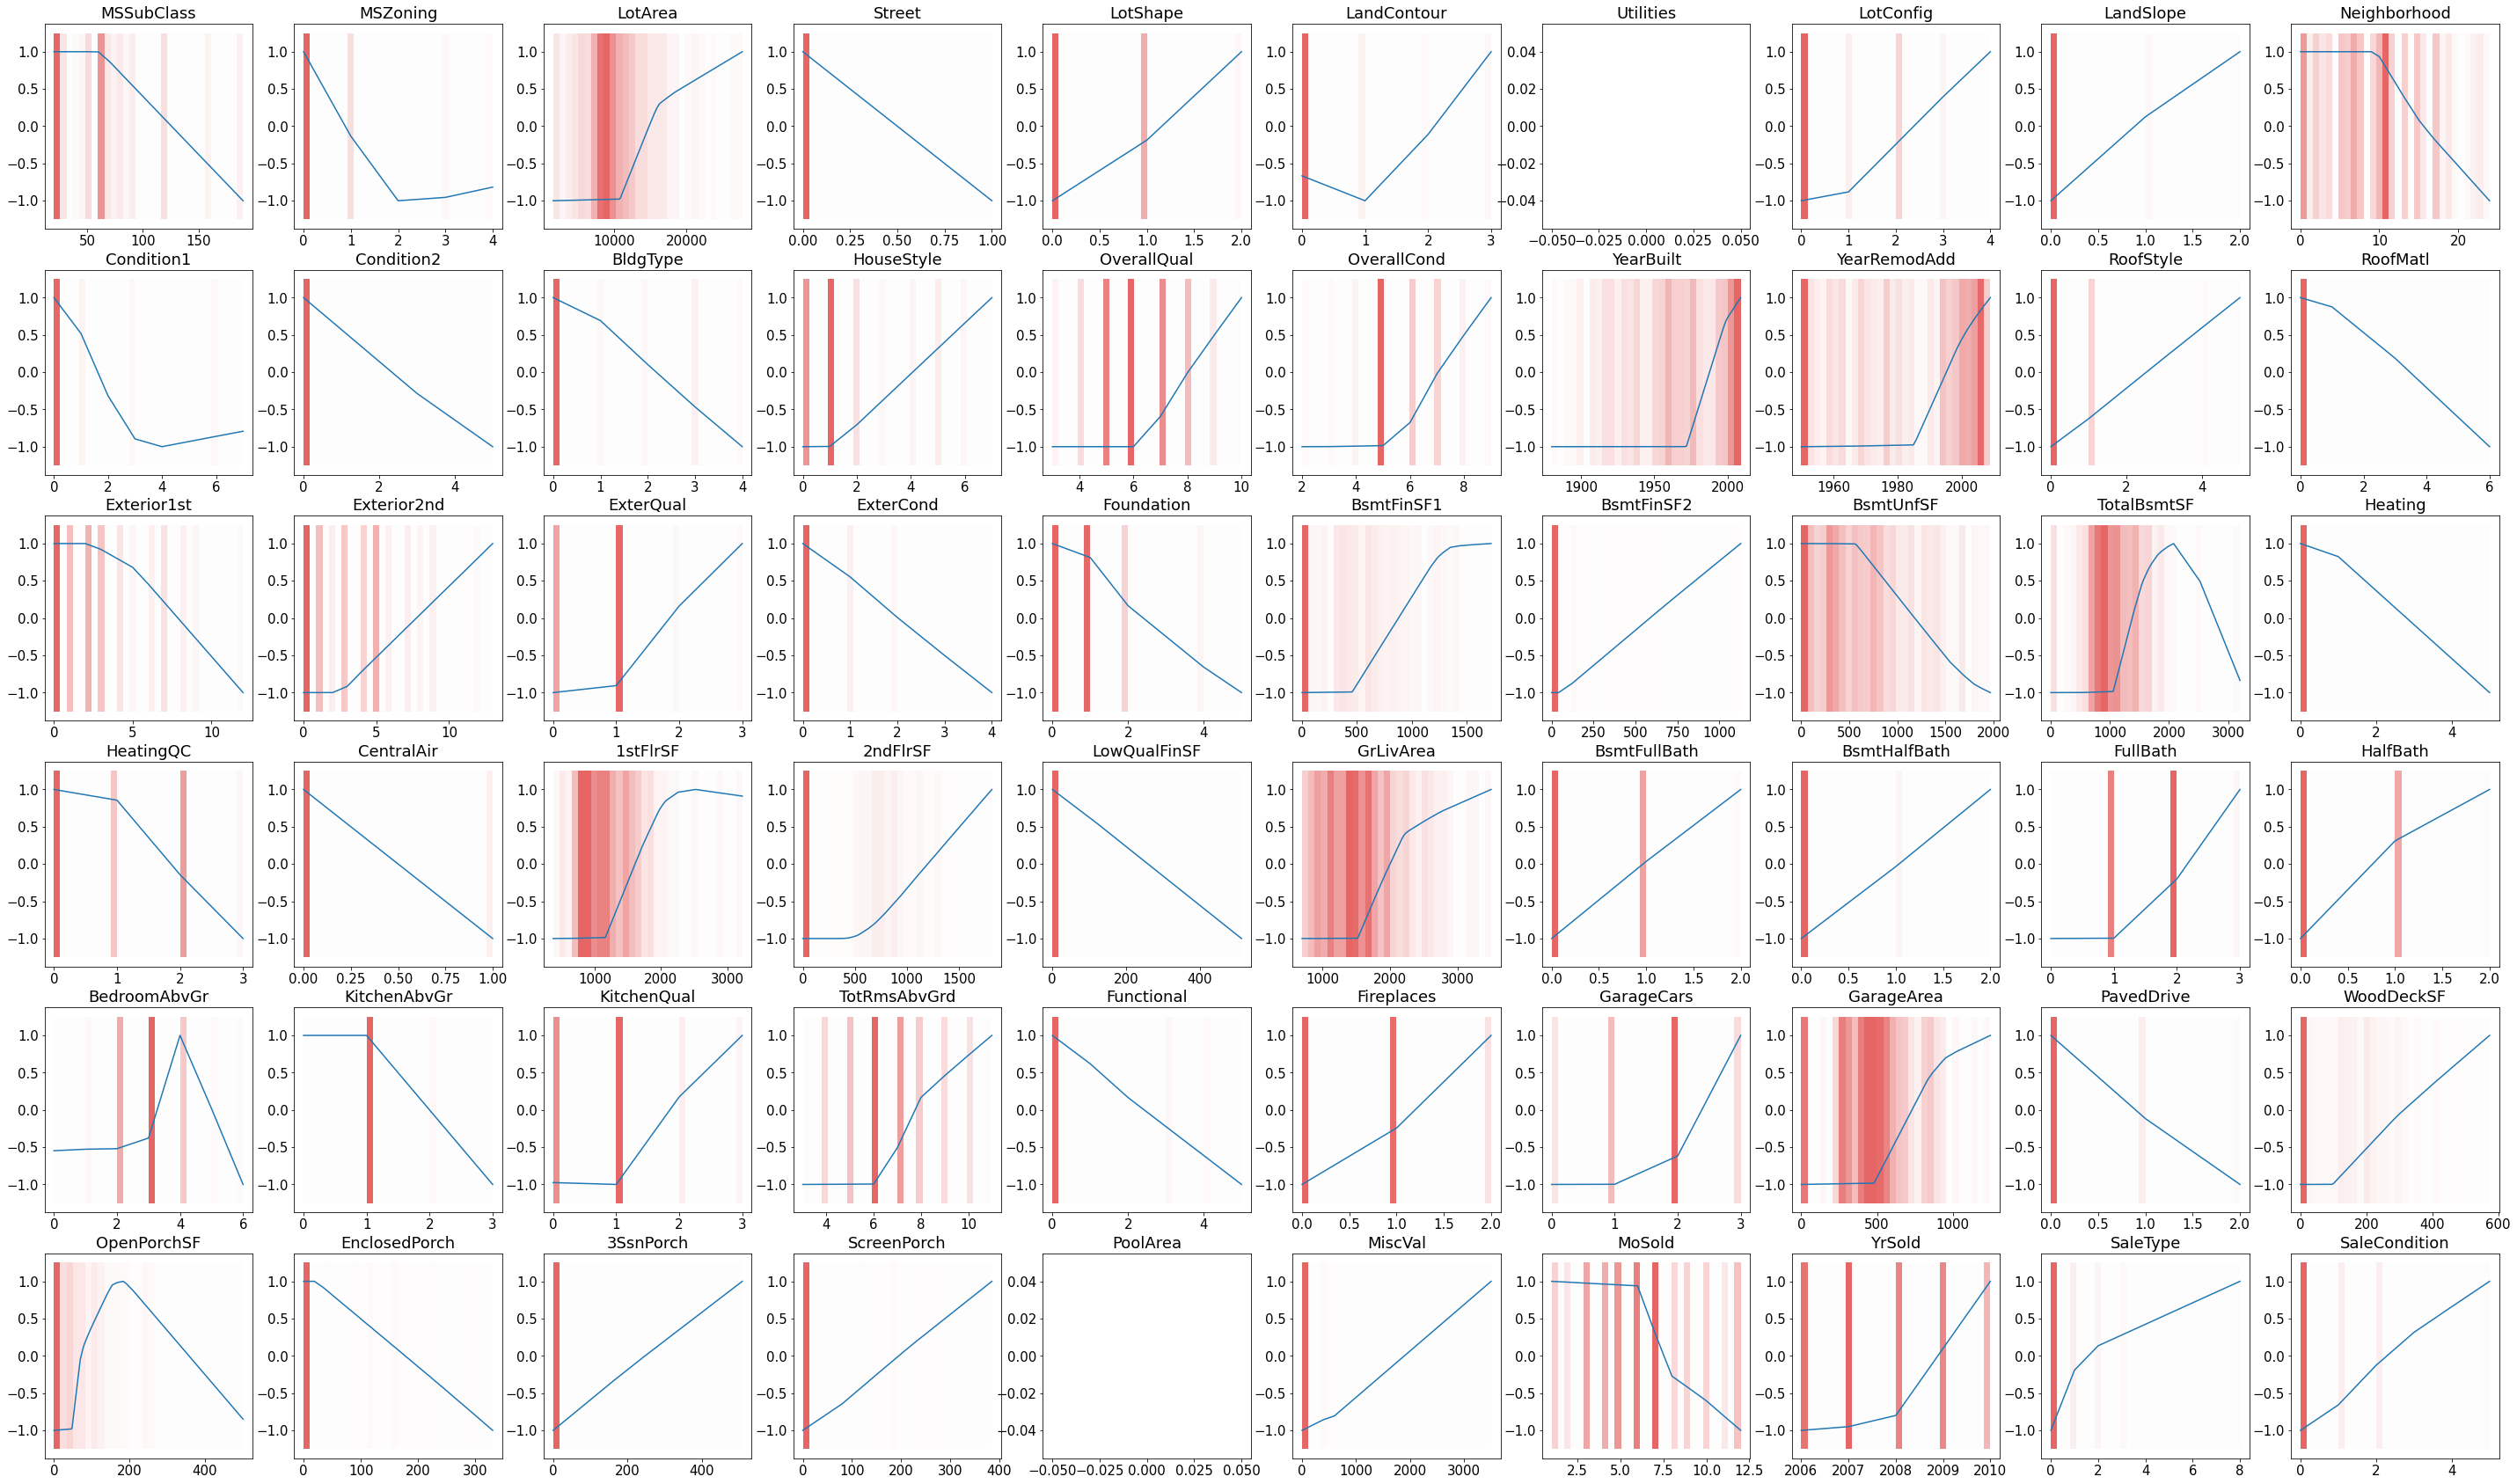

In [72]:
plt.rcParams['font.size'] = 15
n_fig_cols = 10

SScaling = lambda x: 2 * ((x - x.min(0)) / (x.max(0) - x.min(0))) - 1

data = test_x

n_fig_rows = n_feature // n_fig_cols
if n_feature % n_fig_cols != 0:
    n_fig_rows += 1

fig = plt.figure(figsize = (n_fig_cols * 5,n_fig_rows * 5))
for n_fig,fn in enumerate(range(n_feature),1):
    
    x = data[:,fn]
    unique_x = np.unique(x)
    extracted_features = nam.features_list[fn](unique_x[:,np.newaxis],False).numpy()
    extracted_features = SScaling(extracted_features)
    
    ax = fig.add_subplot(n_fig_rows,n_fig_cols,n_fig)
    axes_x = [unique_dict['test'][fn]] * n_class
    for fx,fy in zip(axes_x,extracted_features.transpose()):
        ax.plot(fx,fy)
    ax.set_title(column_x[fn])
    
    max_x,min_x = unique_dict['test'][fn].max(), unique_dict['test'][fn].min()
    max_y,min_y = extracted_features.max(), extracted_features.min()
    
    density, bins = np.histogram(x,30)
    normed_density = density / density.max()
    segments = (max_x - min_x) / x_n_blocks
    
    rect_params = []

    for p in range(x_n_blocks):
        start_x = min_x + segments * p
        end_x = min_x + segments * (p + 1)
        d = min(1.0, 0.01 + normed_density[p])
        rect_params.append((d, start_x, end_x))

    for param in rect_params:
        alpha, start_x, end_x = param
        rect = patches.Rectangle(
            (start_x, min_y - .25),
            end_x - start_x,
            max_y - min_y + .5,
            linewidth=0.01,
            edgecolor=color,
            facecolor=color,
            alpha=alpha,
        )
        ax.add_patch(rect)
fig.savefig('reg_cont.png')

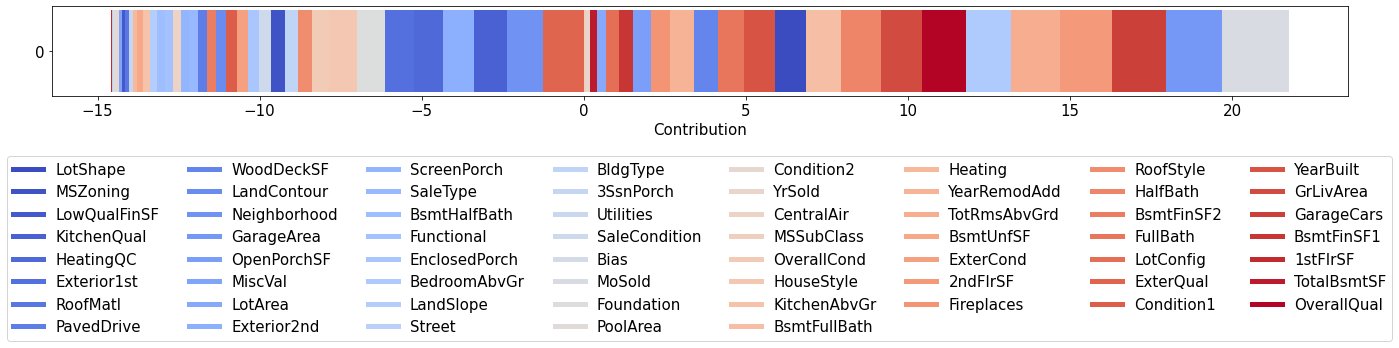

In [75]:
sample_number = 2

plt.rcParams['font.size'] = 15

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y, Min, Max: (y - Min) / (Max - Min)

sample_data = np.concatenate([test_x[sample_number],nam.b.numpy()])

cont_df = pds.DataFrame(
    sample_data,
#     columns = (f'Class: {inv_unique_target[n]}' for n in range(n_class)), 
    index = list(column_x) + ['Bias']
)

cont_list = total_contribution.numpy().copy()

bias_cont_list = np.concatenate([cont_list.mean(0),[nam.b.numpy().mean(0)]])
bias_columns_x_list = np.array(list(column_x) + ['Bias'])
color_dict = {
    col : my_cmap(n * 255 // n_feature) for n,col in enumerate(
        bias_columns_x_list[np.argsort(np.abs(bias_cont_list))])}

fig = plt.figure(figsize = (20,5))
ax = fig.add_axes((.05, .7, .9, .25))

for n,(cls_x,df_x) in enumerate(cont_df.iteritems()):
    df_x = df_x.sort_values()
    Min,Max = df_x.min(), df_x.max()
    
    neg_df = df_x.loc[df_x < 0]
    pos_df = df_x.loc[df_x >= 0]
    
    prev_x = 0
    for col,x in neg_df.iteritems():
        ax.barh(height = .2, y = n, width = x, left = prev_x,color = color_dict[col])
        prev_x += x
        
    prev_x = 0
    for col,x in pos_df.iteritems():
        ax.barh(height = .2, y = n, width = x, left = prev_x,color = color_dict[col])
        prev_x += x
        
        
ax.set_yticks(range(n_class))
ax.set_xlabel('Contribution')

fig.legend(handles = [
    MP.patches.mlines.Line2D([],[],5,color = color_dict[col], label = col) for \
    col in color_dict.keys()
],ncol = 8,loc = 'lower center')

fig.savefig('reg_sample.png')